# Correlation

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
data=pd.read_csv("train.csv",nrows=50000)

In [8]:
data.shape

(50000, 133)

In [9]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


For Simplicity lets use only numerical variables of dataset

In [10]:
numerics=['int16','int32','int64','float16','float32','float64']
numerical_vars=list(data.select_dtypes(include=numerics).columns)
data=data[numerical_vars]
data.shape

(50000, 114)

In Feature Selection , it is a good practice to select the features by examining only the training set

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),
                                               data['target'],test_size=0.3,random_state=0)

In [14]:
(X_train.shape,y_train.shape)

((35000, 112), (35000,))

In [15]:
(X_test.shape,y_test.shape)

((15000, 112), (15000,))

### Visualizing Correlated features with correlation matrix

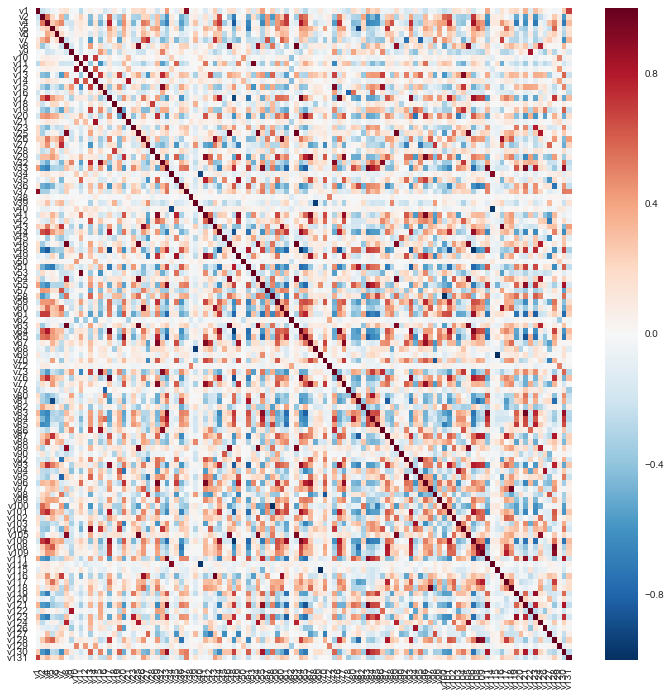

In [30]:
corr_matrix=X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(12,12)
sns.heatmap(corr_matrix)



We can see many features are correlated with each other , We will check these features. We will consider highly correlated feature as the ones which have a correlation greater than 0.8

### 1. Brute Force Approach 

In [36]:
X_train.corr().head()

,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
v1,1.000000,-0.214441,-0.138651,-0.060750,-0.015902,0.105593,0.158376,-0.024072,-0.012149,-0.270903,...,0.354872,-0.139074,0.300772,0.150405,0.028196,-0.005724,-0.028201,-0.020508,0.262435,0.699832
v2,-0.214441,1.000000,0.535565,0.201908,0.015211,0.348694,-0.367301,-0.013361,0.057521,0.229426,...,-0.570172,0.169511,-0.593245,-0.256479,-0.099032,0.008931,0.260275,0.081289,-0.579851,0.175647
v4,-0.138651,0.535565,1.000000,0.260137,0.377441,0.477087,-0.169936,-0.209665,0.091749,0.119699,...,-0.610183,0.040277,-0.710741,-0.050260,-0.120078,0.298108,0.490682,0.114618,-0.703246,0.313911
v5,-0.060750,0.201908,0.260137,1.000000,0.244101,0.051695,-0.004658,-0.170264,0.050314,0.117920,...,-0.353672,0.016612,-0.232443,0.072054,-0.094224,-0.230728,0.590853,0.047445,-0.253705,0.153792
v6,-0.015902,0.015211,0.377441,0.244101,1.000000,0.200610,0.028994,-0.048997,0.054143,0.058636,...,-0.277890,0.084340,-0.304233,0.034918,-0.173586,0.162040,0.235247,0.055887,-0.298493,0.158442


In [37]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything else
# without any other insight.

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [38]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

55

There are 55 features that are highly correlated with other features. We can drop these features.

In [40]:
X_train.drop(labels=corr_features,axis=1,inplace=True)
X_test.drop(labels=corr_features,axis=1,inplace=True)

In [41]:
(X_train.shape,y_train.shape)

((35000, 57), (35000,))

In [42]:
(X_test.shape,y_test.shape)

((15000, 57), (15000,))

So we can see from 112 numerical feature we are left with 57 features

### Approach 2: Identify groups of highly correlated features

In [44]:
X_train,X_test,y_train,y_test=train_test_split(data.drop(labels=['target','ID'],axis=1),
                                               data['target'],test_size=0.3,random_state=0)
print((X_train.shape,y_train.shape))
print((X_test.shape,y_test.shape))


((35000, 112), (35000,))
((15000, 112), (15000,))


In [56]:
corrmat = X_train.corr()
corrmat = corrmat.abs().stack() # absolute value of corr coef
corrmat = corrmat.sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.8]
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat.head()

,feature1,feature2,corr
0,v100,v58,0.997974
1,v58,v100,0.997974
2,v115,v69,0.993229
3,v69,v115,0.993229
4,v17,v76,0.992511


We will find groups of correlated features now

In [82]:
grouped_feature_ls = []
correlated_groups = []

for feature in corrmat.feature1.unique():
    if feature not in grouped_feature_ls:

        # find all features correlated to a single feature
        correlated_block = corrmat[corrmat.feature1 == feature]# Slicing all the rows of feature that is being investigated
        grouped_feature_ls = grouped_feature_ls + list(
            correlated_block.feature2.unique()) + [feature]

        # append the block of features to the list
        correlated_groups.append(correlated_block)

print('found {} correlated groups'.format(len(correlated_groups)))
print('out of {} total features'.format(X_train.shape[1]))

found 32 correlated groups
out of 112 total features


In [86]:
for i in range(len(correlated_groups)):
    print(correlated_groups[i])
    print()

  feature1 feature2      corr
0     v100      v58  0.997974

  feature1 feature2      corr
2     v115      v69  0.993229

    feature1 feature2      corr
4        v17      v76  0.992511
9        v17      v64  0.982145
107      v17      v48  0.910103
130      v17      v93  0.887841
174      v17     v106  0.854995
218      v17      v44  0.818050
243      v17     v101  0.800001

   feature1 feature2      corr
6       v46      v63  0.991521
10      v46      v25  0.982115
24      v46       v8  0.974733
58      v46     v105  0.944465
72      v46      v89  0.932504
88      v46      v54  0.918355

    feature1 feature2      corr
16       v60      v26  0.980037
148      v60      v43  0.872723
176      v60     v116  0.854290

   feature1 feature2      corr
18      v92      v95  0.978357

   feature1 feature2      corr
28     v114      v40  0.966750
99     v114      v34  0.911422

    feature1 feature2      corr
30       v83     v121  0.966052
35       v83      v33  0.964033
115      v83     v111

Now we will choose on feature from each group. And there are different ways of doing

Check if there are any missing values in these groups, If there is a significant difference we can remove those columns

In [101]:
for data_corr in correlated_groups:
    for feature in list(data_corr.feature2.unique())+list(data_corr.feature1.unique()):
        print(feature,X_train[feature].isnull().sum())
    print()

v58 15290
v100 15290

v69 15308
v115 15308

v76 15275
v64 15275
v48 15275
v93 15288
v106 15275
v44 15275
v101 15275
v17 15275

v63 14940
v25 14940
v8 14940
v105 14949
v89 14940
v54 14940
v46 14940

v26 15288
v43 15290
v116 15290
v60 15288

v95 15292
v92 15292

v40 32
v34 32
v114 10

v121 15291
v33 15288
v111 15288
v55 15288
v130 15292
v65 15291
v83 15288

v118 15292
v97 15292

v29 15288
v41 15288
v77 15288
v67 15288
v96 15288

v108 14942
v109 14942
v87 14951
v128 14942

v53 15290
v11 15290

v39 15290
v68 15290

v15 15290
v32 15288
v73 15290

v13 15288
v104 15288

v10 24
v12 26

v65 15291
v20 15291

v32 15288
v15 15290
v86 15288

v5 14942
v87 14951
v51 15562
v81 14942

v41 15288
v35 15288
v67 15288
v49 15288

v1 15288
v37 15292

v105 14949
v54 14940
v25 14940
v124 14940

v106 15275
v123 15562
v61 15275

v123 15562
v119 15563

v94 15288
v103 15288

v98 14953
v70 14947

v48 15275
v106 15275
v64 15275
v4 15275

v94 15288
v126 15288

v14 0
v21 187

v80 15293
v33 15288
v84 15288

v9 15293
v1

In this case only the group v14 and v21 is something where we can drop v21 as it has 187 missing values and v14 has no missing values

For other groups we can choose features for each group by building a random forest classifier on each group and choosing feature with highest feature importance

For example lets use the below group and check how to choose feature

In [105]:
group = correlated_groups[2]
group

,feature1,feature2,corr
4,v17,v76,0.992511
9,v17,v64,0.982145
107,v17,v48,0.910103
130,v17,v93,0.887841
174,v17,v106,0.854995
218,v17,v44,0.818050
243,v17,v101,0.800001


In [106]:
from sklearn.ensemble import RandomForestClassifier

features = list(group.feature2.unique())+['v17']# We will train with all the above features
rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
rf.fit(X_train[features].fillna(0), y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=39,
            verbose=0, warm_start=False)

In [107]:
# we get the feature importance attributed by the 
# random forest model (more on this in coming lectures)

importance = pd.concat(
    [pd.Series(features),
     pd.Series(rf.feature_importances_)], axis=1)

importance.columns = ['feature', 'importance']
importance.sort_values(by='importance', ascending=False)

,feature,importance
2,v48,0.173981
3,v93,0.154484
6,v101,0.129764
1,v64,0.118110
7,v17,0.117571
4,v106,0.113958
0,v76,0.108071
5,v44,0.084062


So in this case from the above feature importance we can choose v48 and drop other values